In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apocolypse-store/customer_data.xlsx
/kaggle/input/apocolypse-store/sale_data.xlsx
/kaggle/input/apocolypse-store/store_data.xlsx


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

In [3]:
store_data = pd.DataFrame(pd.read_excel("/kaggle/input/apocolypse-store/store_data.xlsx"))
customer_data=pd.DataFrame(pd.read_excel("/kaggle/input/apocolypse-store/customer_data.xlsx"))
sale_data=pd.DataFrame(pd.read_excel("/kaggle/input/apocolypse-store/sale_data.xlsx"))

# Explore The Store Data

In [4]:
store_data.head(10)

,Product ID,Product Name,Price,Production Cost
0,10001,Nylon Rope,30.99,13.67
1,10002,Waterproof Matches,7.99,2.89
2,10003,Stainless Steel Axe,45.50,32.45
3,10004,Backpack,39.99,26.92
4,10005,Multitool Survivial Knife,28.99,10.58
5,10006,Solar Battery Flashlight,26.49,13.41
6,10007,Weatherproof Jacket,79.99,30.59
7,10008,Duct Tape,6.25,4.87
8,10009,Water Purifier,30.25,17.93
9,10010,N95 Mask,2.75,1.01


In [5]:
store_data.shape

(10, 4)

In [6]:
store_data.columns

Index(['Product ID', 'Product Name', 'Price', 'Production Cost'], dtype='object')

In [7]:
store_data.isna().sum()

Product ID         0
Product Name       0
Price              0
Production Cost    0
dtype: int64

In [8]:
# Sort the 'store_data' DataFrame in descending order based on the 'Price' column.

store_data = store_data.sort_values(by="Price" ,ascending=False)
store_data

,Product ID,Product Name,Price,Production Cost
6,10007,Weatherproof Jacket,79.99,30.59
2,10003,Stainless Steel Axe,45.50,32.45
3,10004,Backpack,39.99,26.92
0,10001,Nylon Rope,30.99,13.67
8,10009,Water Purifier,30.25,17.93
4,10005,Multitool Survivial Knife,28.99,10.58
5,10006,Solar Battery Flashlight,26.49,13.41
1,10002,Waterproof Matches,7.99,2.89
7,10008,Duct Tape,6.25,4.87
9,10010,N95 Mask,2.75,1.01


In [9]:
#creat a bar chart the visualize the product and the price 
fig = px.bar(store_data , x="Product Name", y ="Price" ,\
            color="Product Name" , title ="Product's Price")
fig.show()

In [10]:
fig = px.bar(store_data , x="Product Name" , y="Production Cost" , color="Product Name" ,title="Product's Production Cost")
fig.show()

In [11]:
fig = px.scatter(store_data, x="Production Cost", y="Price", color="Product Name",title="Production Cost VS Price" ,\
                                            hover_data=['Product Name'] , size='Price')
fig.show()

# Explore Customer Data 

In [12]:
customer_data.shape

(4, 6)

In [13]:
customer_data.isna().sum()

Customer ID    0
Customer       0
Address        0
City           0
State          0
Zipcode        0
dtype: int64

In [14]:
customer_data.dtypes

Customer ID     int64
Customer       object
Address        object
City           object
State          object
Zipcode         int64
dtype: object

In [15]:
sale_data.head(5)

,Cust ID,Customer,Product ID,Order ID,Units Sold,Date Purchased
0,NaN,Uncle Joe's Prep Shop,10006,1904,32,2022-01-01
1,NaN,Alex The Analyst Apocolype Preppers,10005,3966,68,2022-01-02
2,NaN,Apocolypse Preppers United,10004,7348,69,2022-01-03
3,NaN,Prep4Anything Prepping Store,10005,2409,48,2022-01-04
4,NaN,Uncle Joe's Prep Shop,10010,2045,70,2022-01-05


In [16]:
sale_data.dropna(axis=1 , inplace=True)

In [17]:
sale_data.shape

(74, 5)

In [18]:
# Merge the 'store_data' and 'sale_data' DataFrames using a left join. 
sale_stor_data = store_data.merge(sale_data , how="left")
#The Resulting DataFrame
sale_stor_data



,Product ID,Product Name,Price,Production Cost,Customer,Order ID,Units Sold,Date Purchased
0,10007,Weatherproof Jacket,79.99,30.59,Alex The Analyst Apocolype Preppers,7075,7,2022-01-10
1,10007,Weatherproof Jacket,79.99,30.59,Apocolypse Preppers United,1157,57,2022-01-28
2,10007,Weatherproof Jacket,79.99,30.59,Uncle Joe's Prep Shop,4133,46,2022-01-31
3,10007,Weatherproof Jacket,79.99,30.59,Uncle Joe's Prep Shop,9562,50,2022-02-01
4,10007,Weatherproof Jacket,79.99,30.59,Apocolypse Preppers United,3718,58,2022-02-07
...,...,...,...,...,...,...,...,...
69,10010,N95 Mask,2.75,1.01,Uncle Joe's Prep Shop,3665,76,2022-02-13
70,10010,N95 Mask,2.75,1.01,Prep4Anything Prepping Store,5818,5,2022-02-24
71,10010,N95 Mask,2.75,1.01,Uncle Joe's Prep Shop,2462,10,2022-02-25
72,10010,N95 Mask,2.75,1.01,Uncle Joe's Prep Shop,2059,54,2022-03-01


In [19]:
#table to show the total sells for each product 
#_______________________________________________________

# Calculate the number of orders for each product
orders = sale_stor_data.groupby(["Product Name"])["Order ID"].count()

# Calculate the total units sold for each product
unit_solds = sale_stor_data.groupby(["Product Name"])["Units Sold"].sum()

# obatin both the value of order count and the sum of units for each product 
orders_count = np.array(orders.tolist())
unit_sold_sum = np.array(unit_solds.tolist())

# Create a DataFrame to display the total sales for each product
total_sales = pd.DataFrame({"Product Name": orders.index, "Total Sales": orders_count * unit_sold_sum})

# Sort the DataFrame by total sales in descending order
total_sales = total_sales.sort_values(by="Total Sales", ascending=False)

# Display the table
print(total_sales)

                Product Name  Total Sales
2  Multitool Survivial Knife         6201
4                 Nylon Rope         3510
1                  Duct Tape         3285
6       Stainless Steel Axe          3150
3                   N95 Mask         2744
9        Weatherproof Jacket         1855
5   Solar Battery Flashlight         1092
0                   Backpack         1060
7             Water Purifier          908
8         Waterproof Matches          760


In [20]:
#creating bar chart to visualize the total salles for each product 


fig = px.bar(total_sales , x="Product Name",\
             y="Total Sales" , title="Total Sales For Each Product" , color="Product Name",
               labels={
                     "x": "product name",
                     "y": "total sales"
                 }
            )

#display 
fig.show()

In [21]:
# Merge the 'sale_stor_data' DataFrame with the 'customer_data' DataFrame using a left join.

sale_stor_data = sale_stor_data.merge(customer_data , how="left")

sale_stor_data

,Product ID,Product Name,Price,Production Cost,Customer,Order ID,Units Sold,Date Purchased,Customer ID,Address,City,State,Zipcode
0,10007,Weatherproof Jacket,79.99,30.59,Alex The Analyst Apocolype Preppers,7075,7,2022-01-10,9876,369 Real Avenue,New York,New York,12546
1,10007,Weatherproof Jacket,79.99,30.59,Apocolypse Preppers United,1157,57,2022-01-28,2468,444 Four Street,Benson,Minnesota,93873
2,10007,Weatherproof Jacket,79.99,30.59,Uncle Joe's Prep Shop,4133,46,2022-01-31,1234,123 Main Street,Dallas,Texas,70571
3,10007,Weatherproof Jacket,79.99,30.59,Uncle Joe's Prep Shop,9562,50,2022-02-01,1234,123 Main Street,Dallas,Texas,70571
4,10007,Weatherproof Jacket,79.99,30.59,Apocolypse Preppers United,3718,58,2022-02-07,2468,444 Four Street,Benson,Minnesota,93873
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,10010,N95 Mask,2.75,1.01,Uncle Joe's Prep Shop,3665,76,2022-02-13,1234,123 Main Street,Dallas,Texas,70571
70,10010,N95 Mask,2.75,1.01,Prep4Anything Prepping Store,5818,5,2022-02-24,1357,927 Apoco Street,Jefferson City,Missouri,34979
71,10010,N95 Mask,2.75,1.01,Uncle Joe's Prep Shop,2462,10,2022-02-25,1234,123 Main Street,Dallas,Texas,70571
72,10010,N95 Mask,2.75,1.01,Uncle Joe's Prep Shop,2059,54,2022-03-01,1234,123 Main Street,Dallas,Texas,70571


In [22]:
# Calculate the total number of orders placed by each customer by grouping 'sale_stor_data' by the 'Customer' column
# and counting the unique 'Order ID' values for each group.
total_order = sale_stor_data.groupby("Customer")['Order ID'].count() 
total_order
# Calculate the total units sold to each customer by grouping 'sale_stor_data' by the 'Customer' column
# and summing the 'Units Sold' values for each group.
units_sold= sale_stor_data.groupby("Customer")['Units Sold'].sum()
units_sold

# Compute the total purchases for each customer by multiplying the 'total_order' and 'units_sold' Series element-wise.
# This results in a NumPy array 'total_purchases'.
total_purchases = np.array(total_order.tolist()) *np.array(units_sold.tolist())

# Create a DataFrame 'purchases' with 'Customer' and 'total_purchases' columns to display the total purchases for each customer.
purchases = pd.DataFrame({"Customer" : total_order.index , "total_purchases" : total_purchases   })

# Sort the 'purchases' DataFrame in descending order based on 'total_purchases' to show the top-spending customers at the top.
purchases =purchases.sort_values(by="total_purchases" ,ascending = False)
purchases


,Customer,total_purchases
3,Uncle Joe's Prep Shop,20922
1,Apocolypse Preppers United,16560
0,Alex The Analyst Apocolype Preppers,9808
2,Prep4Anything Prepping Store,9744


In [23]:
fig = px.bar(purchases , x="Customer" , y="total_purchases"  , color="Customer" , title= "Total Purchases by Customer")
fig.show()

In [24]:
# sale_stor_data.query('Customer=="Prep4Anything Prepping Store" ').groupby([ "Product Name"])['Units Sold'].sum()

In [25]:
# fig = px.bar(sale_stor_data , x=sale_stor_data.query('Customer=="Apocolypse Preppers United"' ).groupby([ "Product Name"])['Units Sold'].sum().index \
#              , y=sale_stor_data.query('Customer=="Apocolypse Preppers United"' ).groupby([ "Product Name"])['Units Sold'].sum().tolist() \
#             , title= "Prep4Anything Prepping Store  Buying Pattern"  , color=sale_stor_data.query('Customer=="Apocolypse Preppers United"' ).\
#              groupby([ "Product Name"])['Units Sold'].sum().index ,\
#             labels={
#     "x":"Product Name" , 
#     "y":"Total Sold"
# })
# fig.show()

In [26]:
# fig = px.bar(sale_stor_data , x=sale_stor_data.query('Customer=="Alex The Analyst Apocolype Preppers"' ).groupby([ "Product Name"])['Units Sold'].sum().index \
#              , y=sale_stor_data.query('Customer=="Alex The Analyst Apocolype Preppers"' ).groupby([ "Product Name"])['Units Sold'].sum().tolist() \
#             , title= "Prep4Anything Prepping Store  Buying Pattern"  , color=sale_stor_data.query('Customer=="Alex The Analyst Apocolype Preppers"' ).\
#              groupby([ "Product Name"])['Units Sold'].sum().index ,\
#             labels={
#                      "x":"Product Name" , 
#                     "y":"Total Sold"
# })
# fig.show()

In [27]:
order_by_city = sale_stor_data.groupby(["City"] )["Order ID"].count() 
order_by_city
df =pd.DataFrame({"City" :order_by_city.index , "Order Count" :  order_by_city.tolist()})\
.sort_values(by="Order Count")            
df 

,City,Order Count
2,Jefferson City,16
3,New York,16
0,Benson,20
1,Dallas,22


In [28]:
import plotly.express as px

px.bar(df , x="City" , y="Order Count" ,color="City")


In [29]:
sale_stor_data.dtypes

Product ID                  int64
Product Name               object
Price                     float64
Production Cost           float64
Customer                   object
Order ID                    int64
Units Sold                  int64
Date Purchased     datetime64[ns]
Customer ID                 int64
Address                    object
City                       object
State                      object
Zipcode                     int64
dtype: object

In [30]:
# Import the datetime module for working with dates and times
import datetime

# Extract the year from the 'Date Purchased' column and store it in a new 'Year' column
sale_stor_data['Year'] = sale_stor_data['Date Purchased'].dt.strftime('%Y')

# Get unique years present in the 'Year' column
unique_years = sale_stor_data['Year'].unique()

In [31]:
# Calculate the day of the week from the 'Date Purchased'
sale_stor_data['Day Of Week'] = sale_stor_data['Date Purchased'].dt.day_name()

# Create a new DataFrame containing 'Date Purchased' and 'Day Of Week' columns and display the first 5 rows
date_day_Purchased = sale_stor_data[['Date Purchased', 'Day Of Week']]


In [32]:
# Calculate the order count for each day of the week
order_count_for_each_day = sale_stor_data.groupby(['Day Of Week'])['Order ID'].count()

# Calculate the total number of units sold for each day of the week
number_unit_sold_for_each_day = sale_stor_data.groupby(['Day Of Week'])['Order ID'].sum()

# Calculate the total by multiplying order count and number of units sold for each day
total = order_count_for_each_day.values * number_unit_sold_for_each_day.values


In [33]:
# Create a DataFrame 'df' to store the total order values for each day of the week
# The 'Day' column contains the days of the week, and the 'Total' column contains the corresponding total values
df = pd.DataFrame({"Day": sale_stor_data.groupby(['Day Of Week'])['Order ID'].sum().index, "Total Sales": total})

# Sort the 'df' DataFrame in descending order based on the 'Total' column
df = df.sort_values(by="Total Sales", ascending=False)

# Display the sorted DataFrame 'df'
df

,Day,Total Sales
1,Monday,688061
5,Tuesday,664631
3,Sunday,603746
6,Wednesday,594100
4,Thursday,536640
2,Saturday,512534
0,Friday,465170


In [34]:
fig =px.bar(df , x="Day" , y="Total Sales" , color="Day" ,title="Total Sales By Each Day")
fig.show()

In [35]:
total_sale_for_each_day = sale_stor_data.groupby('Date Purchased')['Units Sold'].sum() 



In [36]:
total_sale_for_each_day = pd.DataFrame(total_sale_for_each_day)
total_sale_for_each_day


,Units Sold
Date Purchased,
2022-01-01,32
2022-01-02,68
2022-01-03,69
2022-01-04,48
2022-01-05,70
...,...
2022-03-11,41
2022-03-12,37
2022-03-13,24


<Axes: xlabel='Date Purchased'>

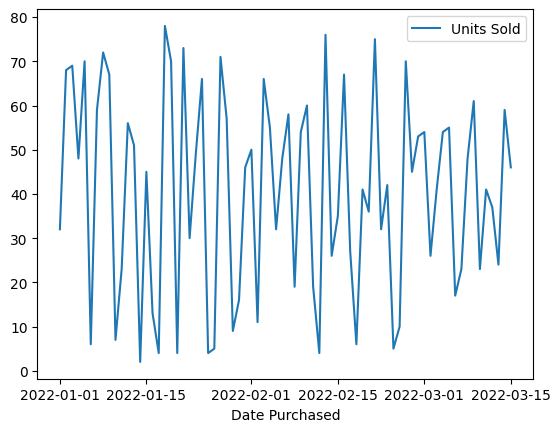

In [37]:
sns.lineplot(data=total_sale_for_each_day)

 # By Doing EDA for apocalypse store Data , We were able to find : 
1. top-selling products
2. identify high-value customer segments
3. If there any notable buying patterns during specific weekday or weekend 
